Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split



<h1>Data Cleaning<h1>

In [3]:

# Load dataset
df = pd.read_csv("C:/Users/hpsli/Favorites/Downloads/Sleep_health_and_lifestyle_dataset.csv")

df.head()

# Checking for missing values
df.isnull().sum()

# Handle missing values (impute, drop, or fill)
# Example: Imputing missing values for numeric columns with the mean

# Dropping duplicate records if any
df_cleaned = df.drop_duplicates()

# Print summary of cleaned data
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df_cleaned = df.drop(columns=['Person ID'])

# Convert 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder' to categorical variables
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype('category')

# Check for missing values and basic statistics for numeric columns
missing_values = df_cleaned.isnull().sum()
statistics = df_cleaned.describe()
df_numeric = df_cleaned.select_dtypes(include=[float, int])

missing_values, statistics

(Gender                       0
 Age                          0
 Occupation                   0
 Sleep Duration               0
 Quality of Sleep             0
 Physical Activity Level      0
 Stress Level                 0
 BMI Category                 0
 Blood Pressure               0
 Heart Rate                   0
 Daily Steps                  0
 Sleep Disorder             219
 dtype: int64,
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
 count  374.000000      374.000000        374.000000               374.000000   
 mean    42.184492        7.132086          7.312834                59.171123   
 std      8.673133        0.795657          1.196956                20.830804   
 min     27.000000        5.800000          4.000000                30.000000   
 25%     35.250000        6.400000          6.000000                45.000000   
 50%     43.000000        7.200000          7.000000                60.000000   
 75%     50.000000        7.800000

<h1>Exploratory Data Analysis<h1>

Univariate analysis

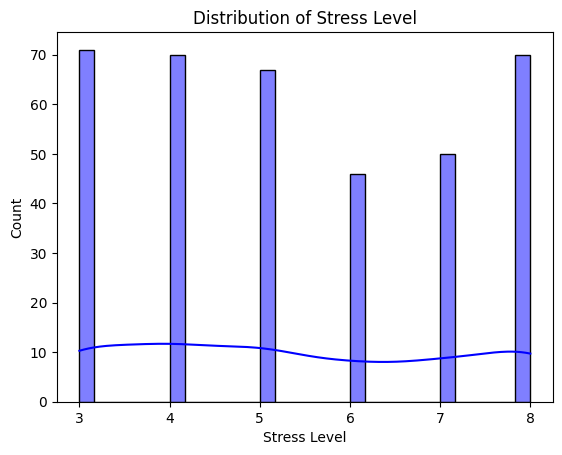

In [4]:
# Distribution of target variable
sns.histplot(df_cleaned['Stress Level'], bins=30, kde=True, color='blue')
plt.title('Distribution of Stress Level')
plt.show()


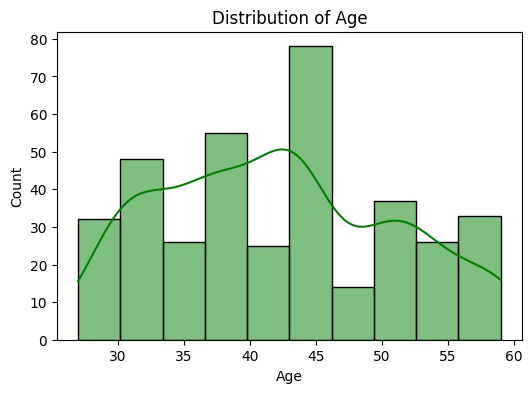

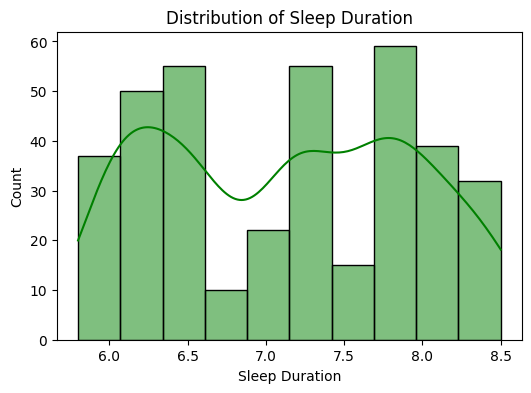

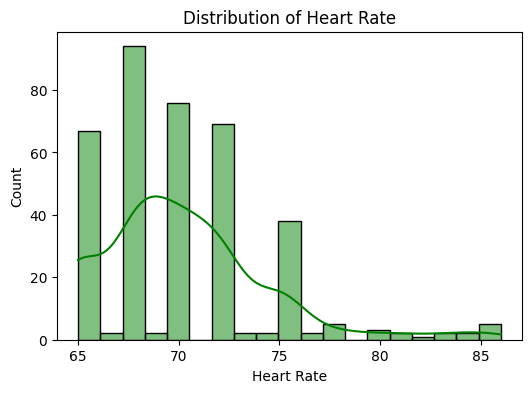

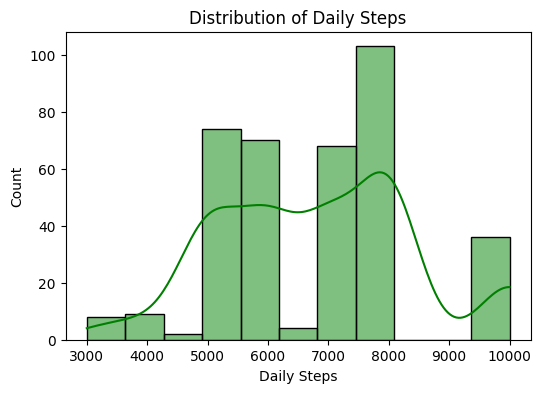

In [5]:
# Plot distribution of continuous features like Age, Sleep Duration, etc.
features = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[feature], kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    plt.show()


C:\Users\hpsli\AppData\Local\Temp\ipykernel_15956\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


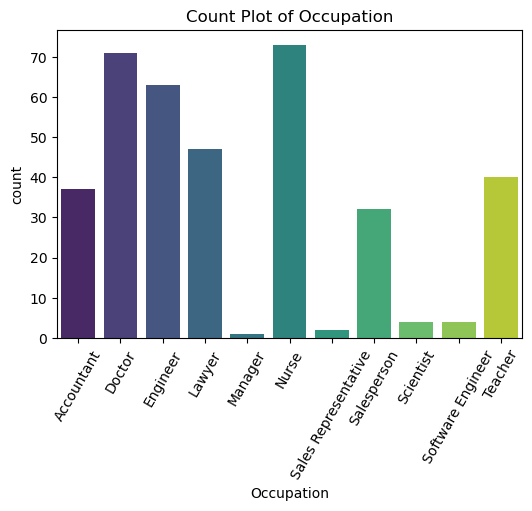

C:\Users\hpsli\AppData\Local\Temp\ipykernel_15956\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


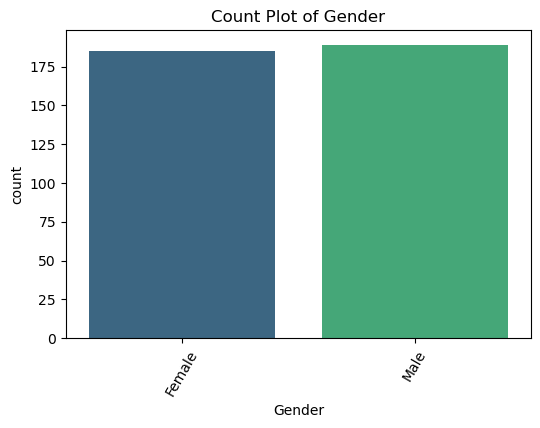

C:\Users\hpsli\AppData\Local\Temp\ipykernel_15956\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


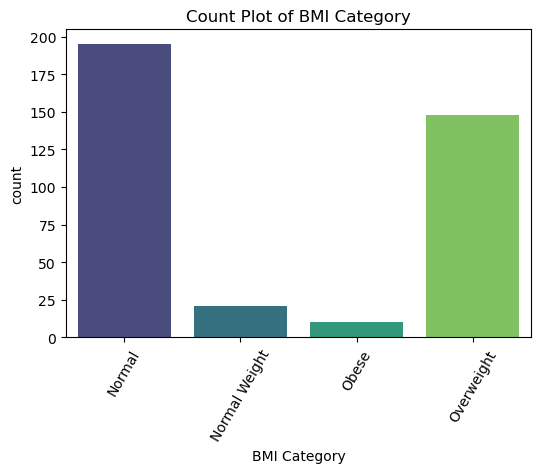

C:\Users\hpsli\AppData\Local\Temp\ipykernel_15956\1151040754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_cleaned, palette='viridis')


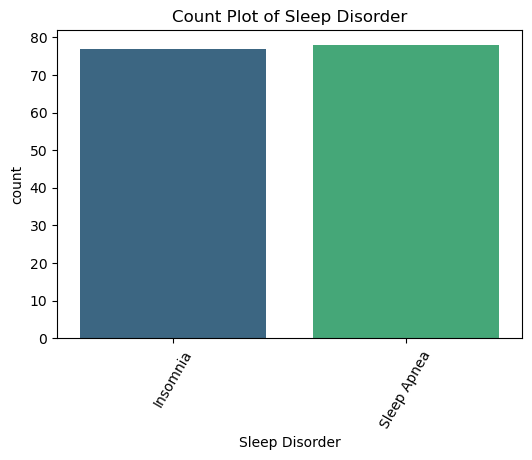

In [5]:
# Plotting the categorical features: Occupation, Gender, etc.
categorical_features = ['Occupation', 'Gender', 'BMI Category', 'Sleep Disorder']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df_cleaned, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=60)
    plt.show()


Bivariate Analysis

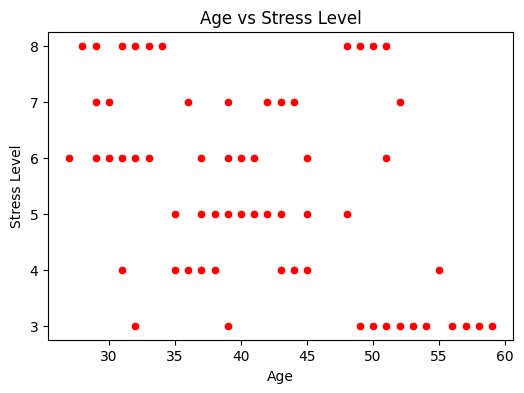

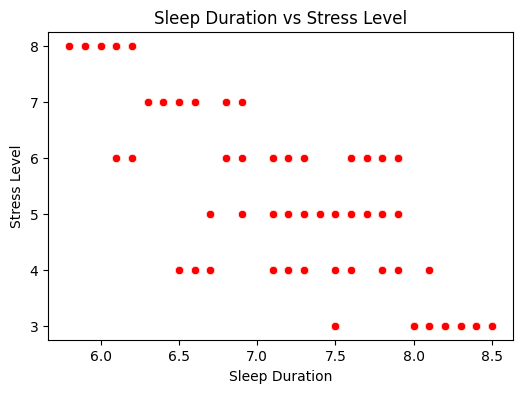

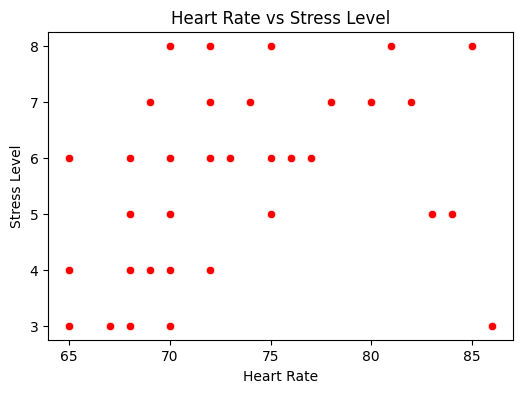

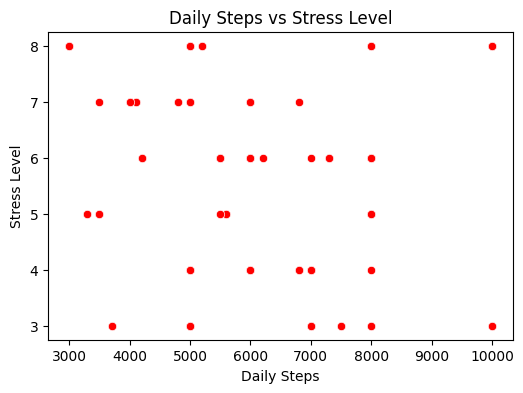

In [7]:
# Scatter plot for continuous features vs. Stress Level
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='Stress Level', data=df_cleaned, color='red')
    plt.title(f'{feature} vs Stress Level')
    plt.show()


C:\Users\hpsli\AppData\Local\Temp\ipykernel_5576\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


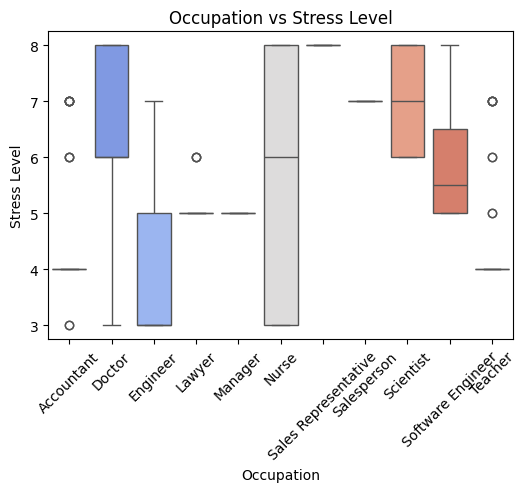

C:\Users\hpsli\AppData\Local\Temp\ipykernel_5576\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


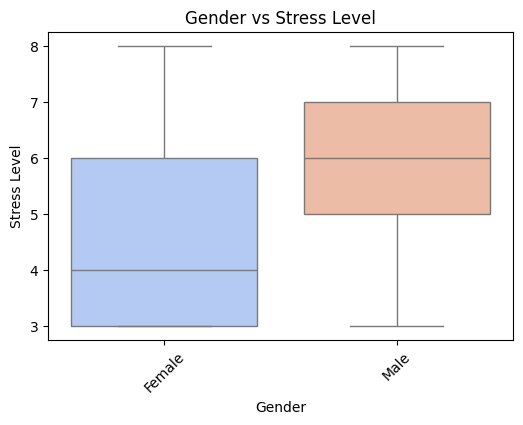

C:\Users\hpsli\AppData\Local\Temp\ipykernel_5576\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


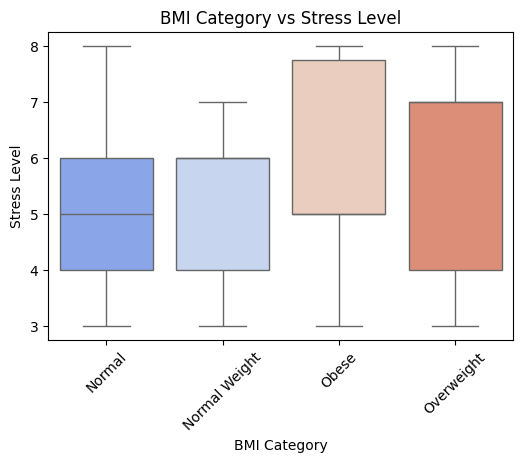

C:\Users\hpsli\AppData\Local\Temp\ipykernel_5576\4182940387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')


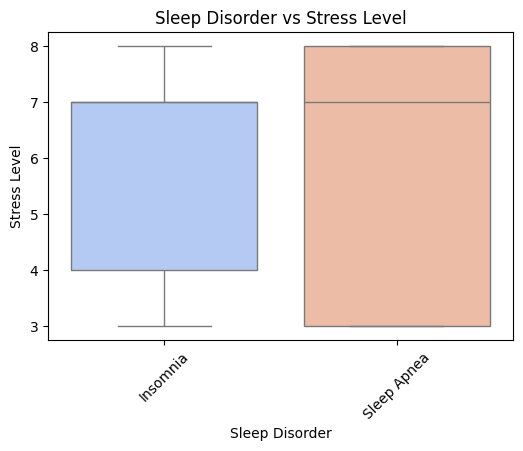

In [8]:
# Boxplot to check distribution of Stress Level across categories
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y='Stress Level', data=df_cleaned, palette='coolwarm')
    plt.title(f'{feature} vs Stress Level')
    plt.xticks(rotation=45)
    plt.show()


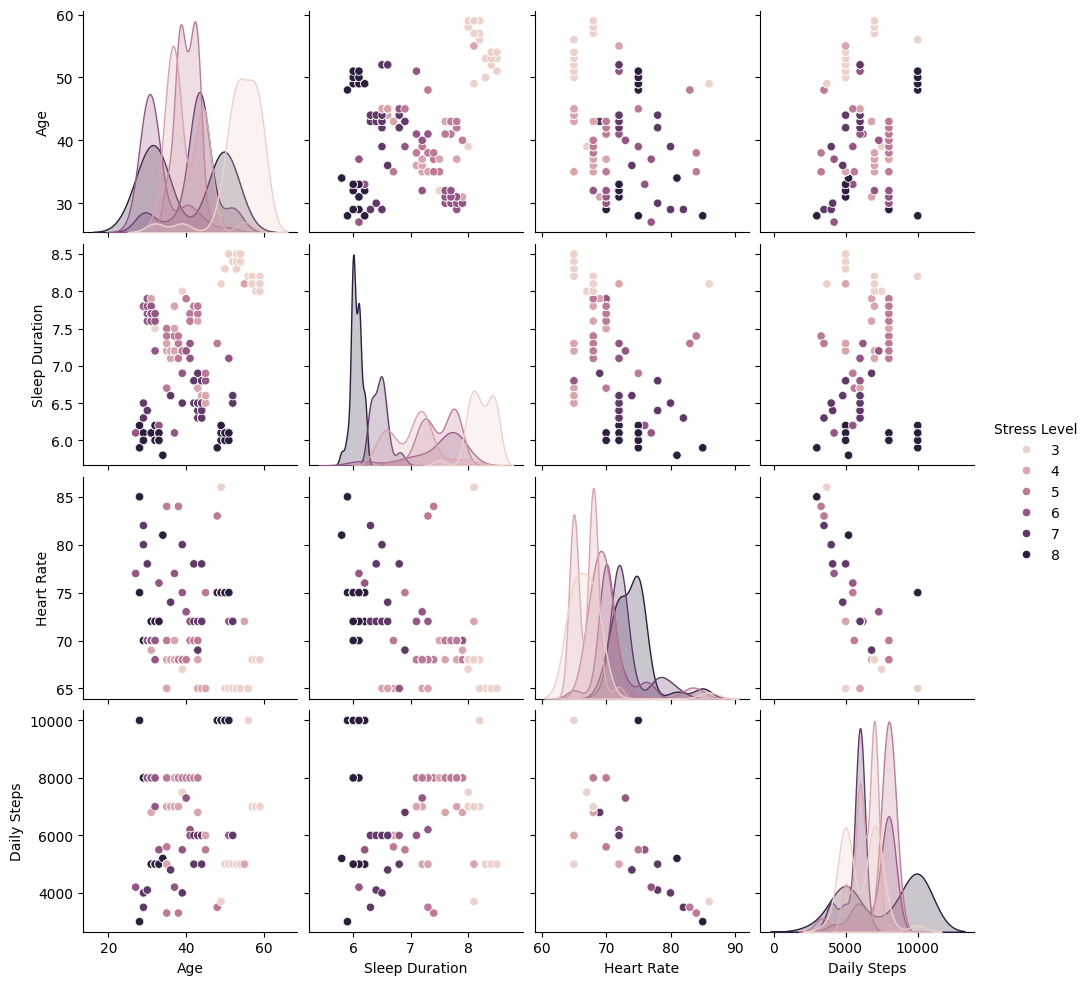

In [9]:
# Pairplot between key variables and stress level
sns.pairplot(df_cleaned, vars=['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'], hue='Stress Level')
plt.show()


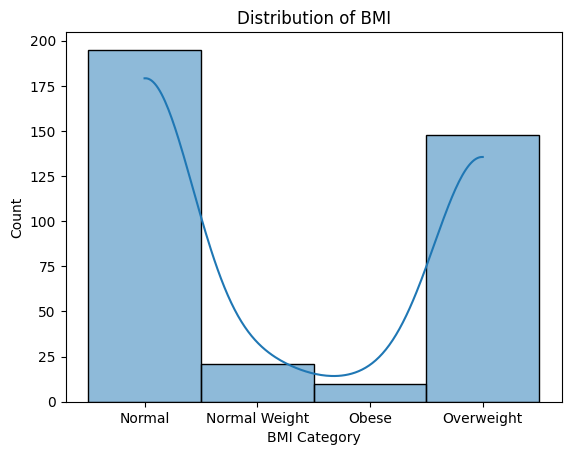

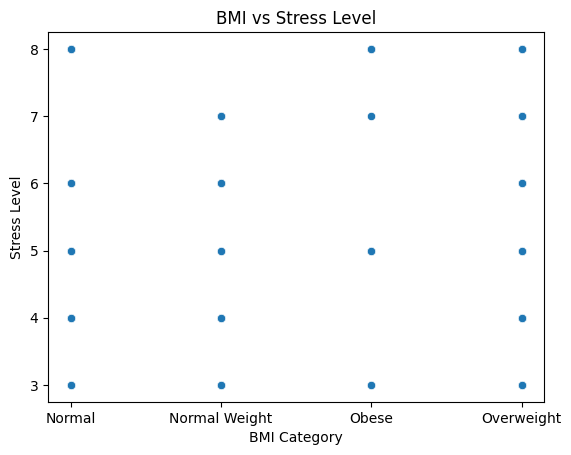

In [10]:
# Example: Creating BMI from weight and height


# Analyzing the new feature (BMI)
sns.histplot(df_cleaned['BMI Category'], kde=True)
plt.title('Distribution of BMI')
plt.show()

# Checking correlation of BMI with Stress Level
sns.scatterplot(x='BMI Category', y='Stress Level', data=df_cleaned)
plt.title('BMI vs Stress Level')
plt.show()


Correlation Analysis

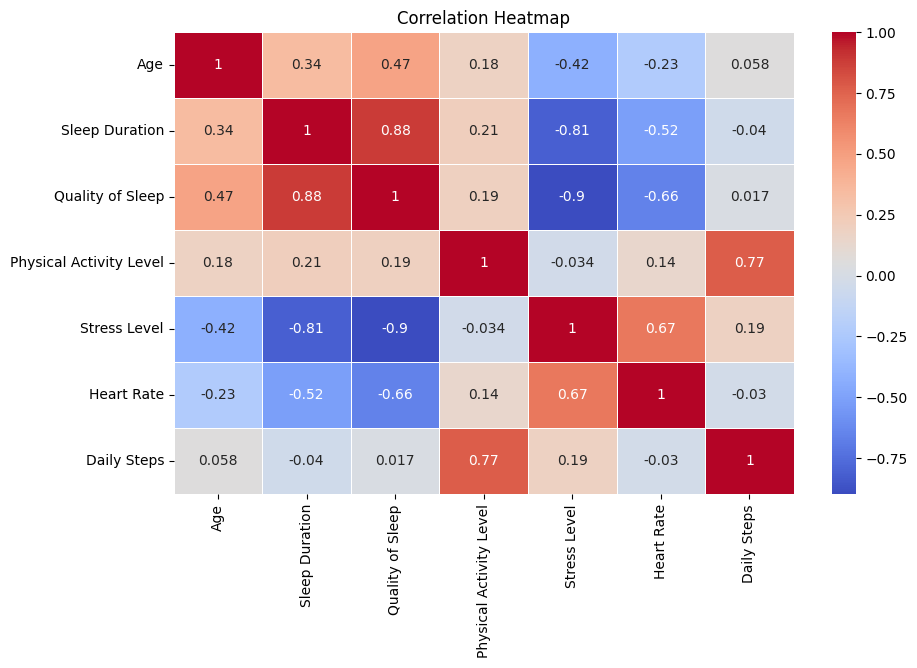

In [11]:
plt.figure(figsize=(10,6))
correlation_matrix = df_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Multivariate Analysis

In [6]:
import plotly.express as px
fig = px.scatter_3d(df_cleaned, x='Age', y='Physical Activity Level', z='Stress Level', color='Gender')
fig.show()


Outlier Detection


C:\Users\hpsli\AppData\Local\Temp\ipykernel_14528\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




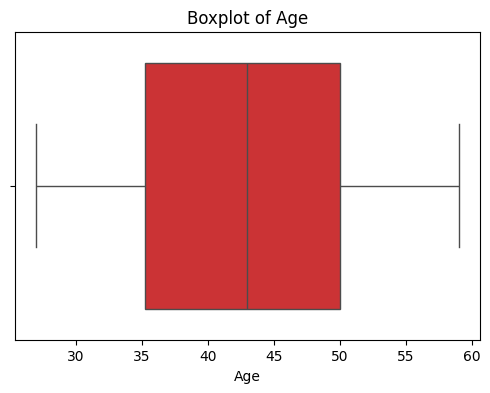

C:\Users\hpsli\AppData\Local\Temp\ipykernel_14528\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




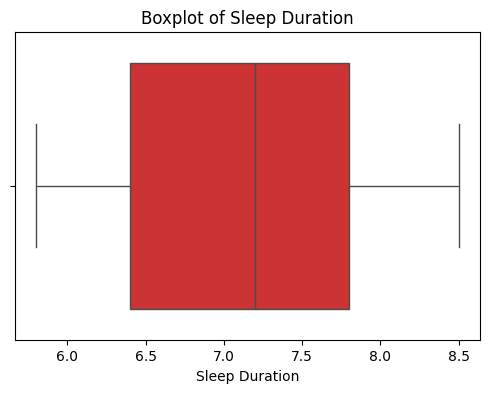

C:\Users\hpsli\AppData\Local\Temp\ipykernel_14528\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




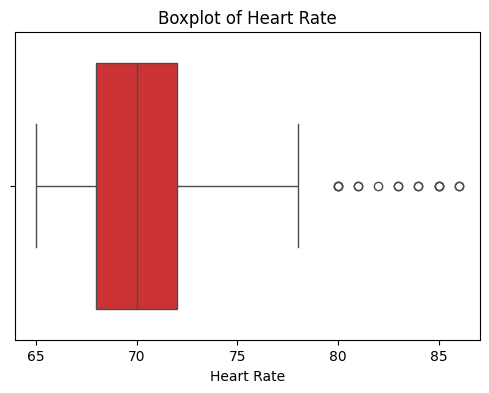

C:\Users\hpsli\AppData\Local\Temp\ipykernel_14528\2277395080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




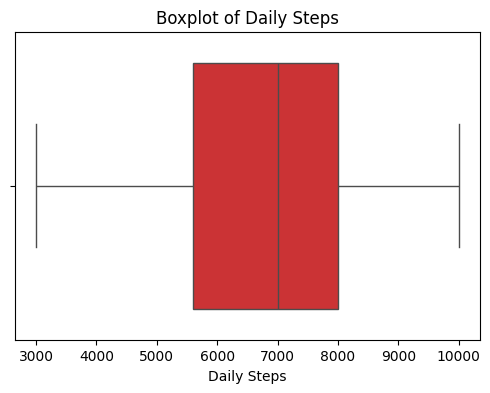

In [14]:
# Boxplot to detect outliers in continuous features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[feature], palette="Set1")
    plt.title(f'Boxplot of {feature}')
    plt.show()


Categorical Feature Analysis

C:\Users\hpsli\AppData\Local\Temp\ipykernel_14528\1949713149.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



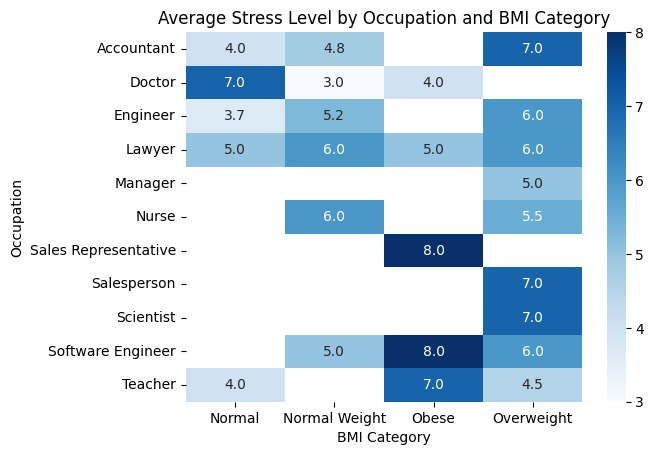

In [15]:
# Heatmap of categorical features using frequency of each combination
pivot = pd.pivot_table(df_cleaned, index='Occupation', columns='BMI Category', values='Stress Level', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".1f")
plt.title('Average Stress Level by Occupation and BMI Category')
plt.show()


Data Preprocessing

In [13]:
# One-hot encode categorical columns (Occupation, Gender, BMI Category, Sleep Disorder)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)  # Drop first to avoid multicollinearity

# Check the newly created columns after encoding
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   Gender_Male                      374 non-null    bool   
 8   Occupation_Doctor                374 non-null    bool   
 9   Occupation_Engineer              374 non-null    bool   
 10  Occupation_Lawyer                374 non-null    bool   
 11  Occupation_Manager               374 non-null    bool   
 12  Occupation_Nurse      

<h1>Model Training <h1>

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import gradio as gr
import joblib

# Load and prepare the dataset (assuming you have it loaded as df_cleaned)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'stress_prediction_model.pkl')




* Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


<h1> Model Deployed as Chatbot Using Gradio <h1>

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import gradio as gr
import joblib
import traceback

# Load and prepare the dataset (assuming you have it loaded as df_cleaned)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'stress_prediction_model.pkl')

# Extract unique occupations from the dataset for the dropdown
unique_occupations = df_cleaned['Occupation'].unique().tolist()
unique_occupations.append("Others")
# Initialize a dictionary to store user responses
user_data = {}

# Define the chatbot function
def chatbot_response(message, history):
    global user_data
    message = message.strip().title()

    try:
        # Step through each question based on user responses
        if "gender" not in user_data:
            user_data["gender"] = message
            return "Great! Thank you for sharing. Could you please tell me your age?"

        
        if "age" not in user_data:
            user_data["age"] = int(message)
            return f"Thank you! Now, Please select your occupation from the following options:\n{', '.join(unique_occupations)}\nIf your occupation is not listed, type 'Others'."

        
        if "occupation" not in user_data:
            if message not in unique_occupations:
                return f"Please select a valid occupation from the list or type 'Others'.\n{', '.join(unique_occupations)}"
            user_data["occupation"] = message
            return "How many hours do you sleep per day?"
        
        if "sleep_duration" not in user_data:
            user_data["sleep_duration"] = float(message)
            return "Thanks! Rate the quality of your sleep on a scale of 1-10."
        
        if "quality_of_sleep" not in user_data:
            user_data["quality_of_sleep"] = int(message)
            return "I appreciate your honesty! Now,Rate your physical activity level on a scale of 1-10."
        
        if "activity_level" not in user_data:
            user_data["activity_level"] = int(message)
            return "Thank you for your response! Please choose a valid BMI category (Normal, Overweight, Obese)."
        
        if "bmi_category" not in user_data:
            if message not in ["Normal", "Overweight", "Obese"]:
                return "Please choose a valid BMI category (Normal, Overweight, Obese)."
            user_data["bmi_category"] = message
            return "Thank you! and What is your systolic blood pressure?"
        
        if "systolic_bp" not in user_data:
            user_data["systolic_bp"] = float(message)
            return "Thank you for your response! What is your diastolic blood pressure?"
        
        if "diastolic_bp" not in user_data:
            user_data["diastolic_bp"] = float(message)
            return "Thanks! Can you please tell me your heart rate?"
        
        if "heart_rate" not in user_data:
            user_data["heart_rate"] = float(message)
            return "Almost there! How many steps do you take daily?"
        
        if "daily_steps" not in user_data:
            user_data["daily_steps"] = int(message)
            return "Thank you for sharing! Do you have any sleep disorders? (None, Sleep Apnea, Insomnia)"
        
        if "sleep_disorder" not in user_data:
            if message not in ["None", "Sleep Apnea", "Insomnia"]:
                return "I appreciate your input! Please choose a valid sleep disorder option (None, Sleep Apnea, Insomnia)."
            user_data["sleep_disorder"] = message

            # All data collected, proceed to prediction
            prediction = predict_stress(
                user_data["gender"], user_data["age"], user_data["occupation"],
                user_data["sleep_duration"], user_data["quality_of_sleep"], 
                user_data["activity_level"], user_data["bmi_category"], 
                user_data["systolic_bp"], user_data["diastolic_bp"], 
                user_data["heart_rate"], user_data["daily_steps"], 
                user_data["sleep_disorder"]
            )
            user_data = {}  # Reset for the next user
            return prediction

    except Exception as e:
        # Print the error stack trace for debugging
        print(traceback.format_exc())
        # Provide a user-friendly message
        return "An error occurred while processing your input. Please try again."

# Function to predict stress level using the existing model
def predict_stress(gender, age, occupation, sleep_duration, quality_of_sleep, activity_level, 
                   bmi_category, systolic_bp, diastolic_bp, heart_rate, daily_steps, sleep_disorder):

    # Create a data frame with the input features
    input_data = pd.DataFrame({
        'Age': [age],
        'Sleep Duration': [sleep_duration],
        'Quality of Sleep': [quality_of_sleep],
        'Physical Activity Level': [activity_level],
        'Heart Rate': [heart_rate],
        'Daily Steps': [daily_steps],
        'Gender_Male': [1 if gender == "Male" else 0],
        'Systolic_BP': [systolic_bp],
        'Diastolic_BP': [diastolic_bp]
    })

    # Handle occupation encoding
    if occupation == "Others":
        # Set all occupation-related columns to 0 for "Others"
        for occupation_option in unique_occupations:
            input_data[f"Occupation_{occupation_option}"] = [0]
    else:
        for occupation_option in unique_occupations:
            input_data[f"Occupation_{occupation_option}"] = [1 if occupation == occupation_option else 0]

    # Ensure all required columns are present
    required_columns = X.columns
    for col in required_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Encode BMI category
    input_data[f'BMI Category_Normal'] = [1 if bmi_category == "Normal" else 0]
    input_data[f'BMI Category_Overweight'] = [1 if bmi_category == "Overweight" else 0]
    input_data[f'BMI Category_Obese'] = [1 if bmi_category == "Obese" else 0]

    # Encode Sleep Disorder
    input_data[f'Sleep Disorder_None'] = [1 if sleep_disorder == "None" else 0]
    input_data[f'Sleep Disorder_Sleep Apnea'] = [1 if sleep_disorder == "Sleep Apnea" else 0]
    input_data[f'Sleep Disorder_Insomnia'] = [1 if sleep_disorder == "Insomnia" else 0]

    # Align with the training set
    input_data = input_data[X.columns]
    
    # Predict the stress level
    prediction = rf_model.predict(input_data)
    stress_level = prediction[0]

    # Provide feedback based on stress level
    if stress_level > 7:
        stress_label = "High"
        suggestion = ("High stress level detected. It's important to address your stress immediately. "
        "Consider practicing deep breathing exercises, mindfulness, or yoga to help manage stress. "
        "Regular physical exercise, such as walking, running, or cycling, can also reduce stress levels. "
        "Make sure you're getting enough sleep (7-9 hours per night) and maintaining a balanced diet. "
        "If these techniques do not help, consider seeking support from a counselor or therapist. "
        "Professional help can provide coping mechanisms to manage long-term stress.")
    elif 5 <= stress_level < 7:
        stress_label = "Medium"
        suggestion = (
        "Moderate stress level detected. This is a manageable level of stress, but you should still take steps "
        "to reduce it. Incorporating stress-relief activities into your daily routine, such as meditation, "
        "listening to calming music, or spending time with loved ones, can be helpful. "
        "Engaging in hobbies or activities you enjoy can serve as a positive outlet. "
        "Make sure you're taking breaks during work or study sessions to avoid burnout. "
        "Getting adequate sleep, staying hydrated, and maintaining regular exercise can further alleviate stress.")
    else:
        stress_label = "Low"
        suggestion = ("Low stress level detected. You're doing well at maintaining balance in your life! "
        "To keep your stress levels low, continue engaging in activities that promote relaxation, "
        "such as spending time outdoors, exercising regularly, and keeping up with healthy sleep habits. "
        "Stay connected with friends and family for emotional support and make time for hobbies you enjoy. "
        "It's also important to maintain a healthy diet and stay active to keep your mental and physical well-being in check.")

    return f"Predicted Stress Level: {stress_label} (Score: {round(stress_level, 2)})\n\nSuggestions: {suggestion}"


# Create Gradio chatbot interface
chatbot = gr.ChatInterface(
    fn=chatbot_response, 
    title="Mental Stress Manager Chatbot",
    description="Hello! Welcome to the Mental Stress Manager Chatbot. Chat with me to assess your stress level and get personalized suggestions.",
    type='messages',
    theme="soft",
    examples=[
        {"text": "Hello! I'm feeling a bit stressed."},
        {"text": "Can you help me with stress management tips?"},
        {"text": "What activities can reduce my stress?"}
    ],)


# Launch the chatbot
if __name__ == "__main__":
    chatbot.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://ee4f6d9b24878c2764.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<h1>Model Evaluation<h1>

In [15]:
from sklearn.metrics import mean_square_error,r2_score, mean_absolute_error

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 0.1514551638824727
Mean Squared Error (MSE): 0.02293866666666667
Mean Absolute Error (MAE): 0.04266666666666667
R-squared (R2): 0.9926579037214066


Model Evaluation using Stratified K-Fold Cross-Validation

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

X = df_encoded.drop(columns=['Stress Level'])
y = df_encoded['Stress Level']

# Use Stratified K-Fold for evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation and evaluate metrics
mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"Average RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"Average MAE: {np.mean(mae_scores)}")
print(f"Average R-squared: {np.mean(r2_scores)}")


Average RMSE: 0.2100592966476564
Average MAE: 0.05456360360360359
Average R-squared: 0.9859309900146362
